## Set Up

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [156]:
# importing packages
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy import stats

## Data structure exploration

1. import data
2. check data type
3. detecting missing values
4. quantile statistics
5. check correlations
6. check distribution of predictors

In [3]:
df = pd.read_csv("C:/Users/admin/Desktop/life_exp.csv")
df.head()

,country,country_code,region,year,life_expect,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,...,hospitals,gov_health_exp,che_gdp,population,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,383.5583,0.137985,0.025695,1.47439,21.7,...,NaN,1.11099,1.90860,16395.473,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,372.3876,0.133675,0.024500,1.94025,21.8,...,NaN,2.04631,4.48352,16945.753,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,354.5147,0.128320,0.023260,2.07512,21.9,...,NaN,1.30863,3.32946,17519.417,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,343.2169,0.122040,0.021925,2.20275,22.0,...,NaN,1.46560,3.54797,18121.479,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,333.8711,0.115700,0.020545,2.41274,22.2,...,NaN,1.68663,3.96720,18758.145,1.3,3560.0,NaN,NaN,NaN,NaN


In [27]:
df.describe()

,year,life_expect,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,...,hospitals,gov_health_exp,che_gdp,population,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,...,130.000000,3011.000000,2994.000000,3.074000e+03,2370.000000,2994.000000,913.000000,1825.00000,571.000000,805.000000
mean,2008.000000,69.146384,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,...,2.044878,3.122935,6.110353,3.707550e+04,2.038397,14964.832999,10.845893,4.53293,81.984472,9.712214
std,4.899767,9.129761,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,...,5.059339,2.091720,2.505267,1.378377e+05,4.593804,17495.137508,17.168798,1.75428,19.665588,2.854723
min,2000.000000,36.227360,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,...,0.000000,0.062360,1.025160,7.601600e+01,0.100000,420.000000,0.100000,0.78744,14.376040,0.559340
25%,2004.000000,63.200095,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,...,0.535162,1.533445,4.238798,2.195105e+03,0.100000,2970.000000,0.600000,3.26283,72.701130,7.735940
50%,2008.000000,71.597200,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,...,1.072725,2.601300,5.758030,8.544297e+03,0.400000,8340.000000,3.100000,4.42541,90.953740,10.270400
75%,2012.000000,75.537030,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,...,2.104830,4.278110,7.850328,2.509552e+04,1.500000,20482.500000,12.400000,5.49498,95.786975,12.070610
max,2016.000000,84.166160,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,...,56.446950,12.062730,20.413410,1.414049e+06,28.200000,122670.000000,94.100000,14.05908,99.998190,14.378800


#### Information gained from above data frame:
- Target variable: life_expect (life expectation at birth)
- Categorical data: region
- Index variable that need to be dropped: country, country_code

In [4]:
# pre-processing
df_cat_num = df.drop(columns = ["country","country_code"])

In [5]:
# knowing data type
df_cat_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           3111 non-null   object 
 1   year             3111 non-null   int64  
 2   life_expect      3111 non-null   float64
 3   adult_mortality  3111 non-null   float64
 4   infant_mort      3111 non-null   float64
 5   age1-4mort       3111 non-null   float64
 6   alcohol          3061 non-null   float64
 7   bmi              3077 non-null   float64
 8   age5-19thinness  3077 non-null   float64
 9   age5-19obesity   3077 non-null   float64
 10  hepatitis        2542 non-null   float64
 11  measles          3092 non-null   float64
 12  polio            3092 non-null   float64
 13  diphtheria       3092 non-null   float64
 14  basic_water      3079 non-null   float64
 15  doctors          1780 non-null   float64
 16  hospitals        130 non-null    float64
 17  gov_health_exp

## Spliting Train and Test dataset

In [11]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=5)

<AxesSubplot:>

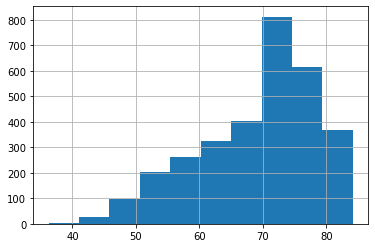

In [12]:
df_cat_num["life_expect"].hist()

In [18]:
df_cat_num["cut_dividing"] = pd.cut(df_cat_num["life_expect"],
                               bins=[0., 58, 68, 73, 78, np.inf],
                               labels=[1, 2, 3, 4, 5])
df_cat_num["cut_dividing"].value_counts()

4    804
2    691
3    652
5    510
1    454
Name: cut_dividing, dtype: int64

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=5)
for train_index, test_index in split.split(df_cat_num, df_cat_num["cut_dividing"]):
    strat_train_set = df_cat_num.loc[train_index]
    strat_test_set = df_cat_num.loc[test_index]

In [22]:
strat_train_set

,region,year,life_expect,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,gov_health_exp,che_gdp,population,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school,cut_dividing
2428,Europe,2014,72.79402,155.22360,0.011100,0.000345,6.85611,27.3,2.7,6.0,...,2.32925,8.43882,4035.311,0.3,9180.0,5.0,NaN,99.58619,12.88351,3
2380,Europe,2000,79.11186,99.17107,0.004450,0.000250,13.92000,24.8,0.7,5.6,...,7.56029,9.58448,59015.096,0.2,26510.0,NaN,NaN,NaN,NaN,5
726,Africa,2012,56.26634,352.34160,0.066080,0.009470,6.52262,24.1,6.0,2.2,...,0.66053,4.54202,21485.265,4.3,2980.0,NaN,2.69718,NaN,NaN,1
643,Africa,2014,64.50674,230.10360,0.045245,0.005310,0.53225,20.5,10.6,0.9,...,0.71479,4.03363,98094.265,1.2,1490.0,NaN,4.60202,NaN,NaN,2
1978,Europe,2006,80.53402,69.35961,0.003135,0.000185,6.47000,26.1,0.7,7.4,...,6.59758,7.91631,4672.994,0.1,54120.0,0.2,6.38566,NaN,12.58201,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,Eastern Mediterranean,2009,64.69608,176.93240,0.077285,0.005265,0.03539,23.3,20.8,1.7,...,0.56858,2.61331,175525.609,0.1,4070.0,NaN,2.59078,54.89264,4.53226,2
1955,Europe,2000,78.15535,83.47723,0.005080,0.000275,10.13097,25.0,1.1,3.9,...,5.32071,7.70696,15926.188,0.1,32450.0,NaN,4.58512,NaN,NaN,5
1954,Europe,2016,80.91451,72.04058,0.002170,0.000150,10.51000,26.6,1.4,9.2,...,6.13078,8.48107,2074.210,0.1,32310.0,NaN,4.80289,NaN,12.74503,5
2983,Western Pacific,2008,66.41190,247.56250,0.026715,0.001435,8.92161,25.2,2.2,2.4,...,3.21819,4.55693,2631.898,0.1,7050.0,NaN,NaN,NaN,NaN,2


## Explore training dataset

In [48]:
df_train = strat_train_set.drop(columns = ["cut_dividing"])
df_test = strat_test_set.drop(columns = ["cut_dividing"])

In [49]:
# check missing data
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace = True, ascending = False)
missing_value_df

# We will deal with missing values later

,column_name,percent_missing
hospitals,hospitals,95.911805
une_literacy,une_literacy,81.717960
une_school,une_school,73.954984
une_poverty,une_poverty,70.188333
doctors,doctors,42.719339
une_edu_spend,une_edu_spend,41.938447
une_hiv,une_hiv,24.345429
hepatitis,hepatitis,19.016996
che_gdp,che_gdp,3.996325
une_gni,une_gni,3.812586


In [50]:
# correlations
corr_matrix = df_train.corr()

# check columns that show high corr with the target variable
corr_matrix["life_expect"].sort_values(ascending=False)

life_expect        1.000000
basic_water        0.834208
une_literacy       0.733357
une_school         0.661071
doctors            0.652342
polio              0.641016
measles            0.637332
diphtheria         0.632611
age5-19obesity     0.624221
gov_health_exp     0.613602
une_gni            0.600411
bmi                0.599354
alcohol            0.416155
hepatitis          0.317615
une_edu_spend      0.297622
che_gdp            0.291822
year               0.207082
population         0.032582
hospitals         -0.109577
une_hiv           -0.516443
age5-19thinness   -0.559280
une_poverty       -0.780943
age1-4mort        -0.870193
infant_mort       -0.929311
adult_mortality   -0.947097
Name: life_expect, dtype: float64

#### basic_water, age1-4mort, infant_mort, and adult_mortality have high correlation (>±0.8) with the target variable. Therefore, in later Data Cleaning section, they will be removed

In [51]:
# check correlation between predictors
corr_matrix.style.background_gradient(cmap='coolwarm')

,year,life_expect,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gov_health_exp,che_gdp,population,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
year,1.000000,0.207082,-0.189886,-0.212001,-0.200564,0.012009,0.172585,-0.074552,0.275789,0.138499,0.160125,0.150814,0.162024,0.124008,0.016101,0.035128,0.082602,0.118012,0.015219,-0.034833,0.167226,-0.228891,0.052572,0.125859,0.181867
life_expect,0.207082,1.000000,-0.947097,-0.929311,-0.870193,0.416155,0.599354,-0.559280,0.624221,0.317615,0.637332,0.641016,0.632611,0.834208,0.652342,-0.109577,0.613602,0.291822,0.032582,-0.516443,0.600411,-0.780943,0.297622,0.733357,0.661071
adult_mortality,-0.189886,-0.947097,1.000000,0.813372,0.769295,-0.260223,-0.520043,0.451399,-0.572629,-0.257237,-0.524857,-0.534999,-0.527084,-0.736608,-0.548722,0.075101,-0.490496,-0.211107,-0.062478,0.682754,-0.536874,0.688810,-0.187780,-0.578208,-0.505995
infant_mort,-0.212001,-0.929311,0.813372,1.000000,0.915827,-0.458961,-0.640884,0.572603,-0.602949,-0.402154,-0.718758,-0.723366,-0.712640,-0.855138,-0.640587,0.118140,-0.577598,-0.243679,-0.002968,0.346151,-0.545755,0.831562,-0.357223,-0.785956,-0.730167
age1-4mort,-0.200564,-0.870193,0.769295,0.915827,1.000000,-0.322724,-0.616233,0.479560,-0.549356,-0.364963,-0.697216,-0.696974,-0.684847,-0.815215,-0.561864,0.169943,-0.449896,-0.168865,-0.035202,0.309263,-0.421369,0.807339,-0.311105,-0.771405,-0.601603
alcohol,0.012009,0.416155,-0.260223,-0.458961,-0.322724,1.000000,0.283320,-0.491339,0.160986,0.120442,0.298350,0.291450,0.295510,0.419482,0.561623,-0.024134,0.537209,0.370333,-0.045885,-0.036478,0.317326,-0.435457,0.234133,0.450734,0.632343
bmi,0.172585,0.599354,-0.520043,-0.640884,-0.616233,0.283320,1.000000,-0.691928,0.811054,0.265273,0.462386,0.431479,0.433623,0.667484,0.464518,-0.014444,0.464854,0.261527,-0.168031,-0.162311,0.412764,-0.666923,0.322266,0.650331,0.464791
age5-19thinness,-0.074552,-0.559280,0.451399,0.572603,0.479560,-0.491339,-0.691928,1.000000,-0.557244,-0.242827,-0.433524,-0.411270,-0.405989,-0.469997,-0.588253,-0.004059,-0.579293,-0.402013,0.282441,0.191377,-0.366496,0.484228,-0.295295,-0.585974,-0.580804
age5-19obesity,0.275789,0.624221,-0.572629,-0.602949,-0.549356,0.160986,0.811054,-0.557244,1.000000,0.244597,0.392843,0.369572,0.370360,0.585891,0.355121,-0.054983,0.432163,0.226738,-0.047131,-0.248491,0.559843,-0.547895,0.252509,0.538745,0.284022
hepatitis,0.138499,0.317615,-0.257237,-0.402154,-0.364963,0.120442,0.265273,-0.242827,0.244597,1.000000,0.677627,0.699797,0.722304,0.341537,0.171265,0.019539,0.139490,0.051741,-0.134738,-0.053982,0.191479,-0.308568,0.180812,0.448889,0.172525


#### from the above correlation table:
- infant_mort and age1-4mort are highly correlated
- basic_water has high correlation to variables including infant_mort, adult_mort, and une_poverty
- une_literacy and une_school have high correlation; and they have high negative correlation with infant_mort
- measles, polio, and diphtheria have high correlation with each other.

#### In later Data Cleaning section, we will drop/keep columns according to the findings.

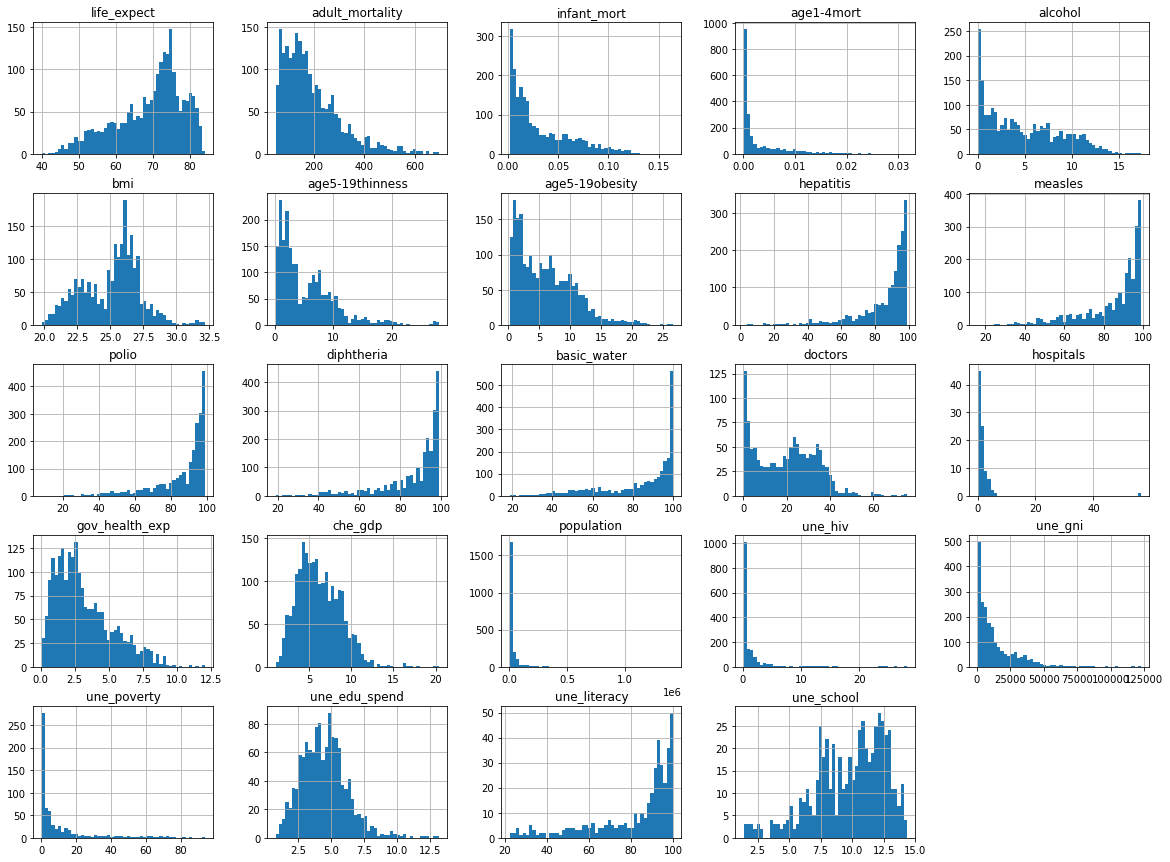

In [52]:
# check distributions of predictors
df_dist_explore = df_train.drop(columns = ["region","year"])
df_dist_explore.hist(bins=50, figsize=(20,15))
plt.show()

#### Now that we gain some basic understandings of the dataset. It is time to clean the dataset.

## Data Cleaning

1. Drop highly correlated columns
2. Deal with columns with missing values that are >= 80%
3. Deal with other columns with missing values
4. Handling categorical variable (region)
5. Build transformation pipeline

In [60]:
# 1. Drop highly correlated columns according to the correlation results above
df_drop = df_train

# drop both infant_mort, age1-4mort, and adult_mortality
df_drop = df_drop.drop(columns = ["infant_mort","age1-4mort","adult_mortality"])
# drop basic_water
df_drop = df_drop.drop(columns = ["basic_water"])

# choose 1 to drop between une_school and une_literacy
# because une_literacy has higher corr to the target variable, we drop une_school
df_drop = df_drop.drop(columns = ["une_school"])

# choose 1 to drop among measles, polio, and diphtheria
# because polio has higher corr to the target variable, we keep it and drop the other 2
df_drop = df_drop.drop(columns = ["measles","diphtheria"])

# df_drop = df_drop.drop(columns = ["infant_mort","age1-4mort","adult_mortality","basic_water","une_school","measles","diphtheria"])

In [61]:
# renew missing value table
percent_missing2 = df_drop.isnull().sum() * 100 / len(df_drop)
missing_value_df2 = pd.DataFrame({'column_name': df_drop.columns,
                                 'percent_missing': percent_missing2})
missing_value_df2.sort_values('percent_missing', inplace = True, ascending = False)
missing_value_df2

,column_name,percent_missing
hospitals,hospitals,95.911805
une_literacy,une_literacy,81.717960
une_poverty,une_poverty,70.188333
doctors,doctors,42.719339
une_edu_spend,une_edu_spend,41.938447
une_hiv,une_hiv,24.345429
hepatitis,hepatitis,19.016996
che_gdp,che_gdp,3.996325
une_gni,une_gni,3.812586
gov_health_exp,gov_health_exp,3.445108


In [62]:
# 2. Deal with columns with missing values that are >= 80%
# The missing % of hospital and une_literacy is too high. We drop the two columns.
df_drop = df_drop.drop(columns = ["hospitals","une_literacy"])

#### From the histograms of predictors above, we can see that many predictors are skewed. Therefore, it is better to replacing the missing values with median values than using mean values.

In [63]:
# 3. Deal with other columns with missing values
imputer = SimpleImputer(strategy="median")
df_drop_num = df_drop.drop("region", axis=1)
imputer.fit(df_drop_num)

# check median values calculation
diff = imputer.statistics_ - df_drop_num.median().values
print(diff)
print("median calculation OK")

# imputing medians
X = imputer.transform(df_drop_num)
df_imputed_num = pd.DataFrame(X, columns=df_drop_num.columns,
                          index=df_drop_num.index)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
median calculation OK


In [64]:
# check imputing result, renew missing value table
percent_missing3 = df_imputed_num.isnull().sum() * 100 / len(df_imputed_num)
missing_value_df3 = pd.DataFrame({'column_name': df_imputed_num.columns,
                                 'percent_missing': percent_missing3})
missing_value_df3.sort_values('percent_missing', inplace = True, ascending = False)
missing_value_df3

,column_name,percent_missing
year,year,0.0
life_expect,life_expect,0.0
alcohol,alcohol,0.0
bmi,bmi,0.0
age5-19thinness,age5-19thinness,0.0
age5-19obesity,age5-19obesity,0.0
hepatitis,hepatitis,0.0
polio,polio,0.0
doctors,doctors,0.0
gov_health_exp,gov_health_exp,0.0


In [65]:
print("number of columns we dropped:",df_train.shape[1] - df_imputed_num.shape[1]-1)
print("number of columns remaining:",df_imputed_num.shape[1]+1)

number of columns we dropped: 9
number of columns remaining: 17


In [66]:
# 4. Handling categorical variable (region)
# use OrdinalEncoder to transform region into numerical forms
df_cat_OE = df_drop
ordinal_encoder = OrdinalEncoder()
df_cat_OE[["region"]] = ordinal_encoder.fit_transform(df_cat_OE[["region"]])
ordinal_encoder.categories_

[array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
        'South-East Asia', 'Western Pacific'], dtype=object)]

In [68]:
# concatenate the numerical columns and the categorical column
df_train_cleaned = pd.concat([df_imputed_num, df_cat_OE[["region"]]], axis=1)
df_train_cleaned

,year,life_expect,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,polio,doctors,gov_health_exp,che_gdp,population,une_hiv,une_gni,une_poverty,une_edu_spend,region
2428,2014.0,72.79402,6.85611,27.3,2.7,6.0,91.0,91.0,47.754,2.32925,8.43882,4035.311,0.3,9180.0,5.0,4.42315,3.0
2380,2000.0,79.11186,13.92000,24.8,0.7,5.6,26.0,98.0,33.547,7.56029,9.58448,59015.096,0.2,26510.0,3.1,4.42315,3.0
726,2012.0,56.26634,6.52262,24.1,6.0,2.2,85.0,85.0,20.905,0.66053,4.54202,21485.265,4.3,2980.0,3.1,2.69718,0.0
643,2014.0,64.50674,0.53225,20.5,10.6,0.9,61.0,68.0,20.905,0.71479,4.03363,98094.265,1.2,1490.0,3.1,4.60202,0.0
1978,2006.0,80.53402,6.47000,26.1,0.7,7.4,92.0,94.0,23.597,6.59758,7.91631,4672.994,0.1,54120.0,0.2,6.38566,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,2009.0,64.69608,0.03539,23.3,20.8,1.7,52.0,52.0,7.951,0.56858,2.61331,175525.609,0.1,4070.0,3.1,2.59078,2.0
1955,2000.0,78.15535,10.13097,25.0,1.1,3.9,92.0,97.0,24.427,5.32071,7.70696,15926.188,0.1,32450.0,3.1,4.58512,3.0
1954,2016.0,80.91451,10.51000,26.6,1.4,9.2,92.0,94.0,30.007,6.13078,8.48107,2074.210,0.1,32310.0,3.1,4.80289,3.0
2983,2008.0,66.41190,8.92161,25.2,2.2,2.4,96.0,95.0,28.816,3.21819,4.55693,2631.898,0.1,7050.0,3.1,4.42315,5.0


## Feature Selection

In [138]:
# use Random Forest

X = df_train_cleaned.drop(columns=["life_expect"])
y = df_train_cleaned["life_expect"]

rf = RandomForestRegressor(n_estimators = 100, random_state = 5)
model = rf.fit(X,y)
model.feature_importances_
importance = pd.DataFrame(list(zip(X.columns,model.feature_importances_)),columns=['predictor','feature importance'])
print(importance.sort_values(by=['feature importance'],ascending = False))

          predictor  feature importance
15           region            0.524128
12          une_gni            0.194735
11          une_hiv            0.063276
6             polio            0.047409
3   age5-19thinness            0.044791
0              year            0.031883
4    age5-19obesity            0.017488
9           che_gdp            0.013360
8    gov_health_exp            0.013170
10       population            0.013136
2               bmi            0.012342
1           alcohol            0.011882
5         hepatitis            0.005212
7           doctors            0.003570
14    une_edu_spend            0.002733
13      une_poverty            0.000885


#### From the feature selection result, region and une_gni are the 2 most effective predictors. We set the importance threshold at 0.4. Therefore, in later model training, we will include region, une_gni, une_hiv, polio, and age5-19thinness as predictors.

## Build Transformation Pipeline Based On Data Cleaning Steps

In [118]:
# Transform train dataset with pipeline
df_train_drop = df_train[["region", "une_gni", "une_hiv", "polio", "age5-19thinness"]]
df_train_num = df_train_drop.drop(columns=["region"])

# numerical columns - imputation and standardization
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_attribs = list(df_train_num)
train_cat_attribs = ["region"]

# plus categorical column's encoding
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_num_attribs),
        ("cat", OrdinalEncoder(), train_cat_attribs),
    ])

# prepared list
train_prepared = full_pipeline.fit_transform(df_train_drop)

In [119]:
np.shape(train_prepared)

(2177, 5)

## Select and Train a Model

In [120]:
# get target variable
train_labels = df_train_cleaned["life_expect"]

In [140]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

# check MSE and MAE
predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(train_labels, predictions)

print("RMSE = ", lin_rmse)
print("MAE = ", lin_mae)

RMSE =  4.381093135016645
MAE =  3.420616134478899


In [141]:
# Decision Tree Model
tree_reg = DecisionTreeRegressor(random_state = 5)
tree_reg.fit(train_prepared, train_labels)

# check MSE and MAE
predictions2 = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, predictions2)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(train_labels, predictions2)

print("RMSE = ", tree_rmse)
print("MAE = ", tree_mae)

RMSE =  0.07260988309187132
MAE =  0.0036049701423977974


In [142]:
# Random Forest Model
forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 5)
forest_reg.fit(train_prepared, train_labels)

predictions3 = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, predictions3)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(train_labels, predictions3)

print("RMSE = ", forest_rmse)
print("MAE = ", forest_mae)

RMSE =  0.6063191959994314
MAE =  0.38483020646586663


## Better Evaluation Using Cross-Validation

In [129]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [131]:
# display linear regression scores
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.14245134 4.21618076 4.48961493 4.66053992 4.4489331  4.87445082
 4.16022269 4.09329142 4.21891024 4.57737845]
Mean: 4.3881973678295765
Standard deviation: 0.24858753906824163


In [143]:
# display decision tree scores
tree_scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [1.97558475 2.14160286 2.14664095 2.18068907 2.29093146 2.17583341
 2.66648942 2.50005954 2.20807698 2.20192779]
Mean: 2.2487836224853304
Standard deviation: 0.18701971197748268


In [144]:
# display random forest scores
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1.72919904 1.48897018 1.54861173 1.56770729 1.72541767 1.73317239
 1.77706188 1.57039893 1.70900073 1.82754798]
Mean: 1.6677087797181003
Standard deviation: 0.10780057836492389


## Fine-Tune of Model - Grid Search

In [145]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state = 5)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
             param_grid=[{'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [149]:
pd.DataFrame(grid_search.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016600,0.003711,0.001809,0.000752,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-6.219843,-4.368538,...,-5.320556,0.619518,18,-1.530929,-1.729876,-1.387215,-1.599235,-1.417443,-1.532940,0.124706
1,0.032146,0.001449,0.002801,0.000403,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.298832,-3.131832,...,-3.477161,0.270531,8,-0.686983,-0.756354,-0.677553,-0.719160,-0.684162,-0.704842,0.029495
2,0.114591,0.026269,0.005628,0.001193,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.143568,-2.537187,...,-3.242734,0.401400,3,-0.504625,-0.496298,-0.480594,-0.546505,-0.478737,-0.501352,0.024566
3,0.011629,0.000529,0.001667,0.000431,3,3,NaN,"{'max_features': 3, 'n_estimators': 3}",-5.520038,-3.354281,...,-5.115992,0.954189,17,-1.587822,-1.459973,-1.375125,-1.357591,-1.498156,-1.455733,0.084137
4,0.040259,0.003953,0.003185,0.000759,3,10,NaN,"{'max_features': 3, 'n_estimators': 10}",-3.456117,-2.828570,...,-3.569505,0.631019,10,-0.647927,-0.704424,-0.672185,-0.626402,-0.712324,-0.672652,0.032662


In [147]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                      random_state=5)

## Final Model & Evaluating it on the Test Set

In [153]:
# Transform test dataset with pipeline
df_test_drop = df_test[["region", "une_gni", "une_hiv", "polio", "age5-19thinness"]]
df_test_num = df_test_drop.drop(columns=["region"])

test_num_attribs = list(df_test_num)
test_cat_attribs = ["region"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, test_num_attribs),
        ("cat", OrdinalEncoder(), test_cat_attribs),
    ])

# prepared list
test_X = full_pipeline.fit_transform(df_test_drop)

In [155]:
# Define the final 
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_X)
text_Y = strat_test_set["life_expect"]

final_mse = mean_squared_error(text_Y, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE = ", final_rmse)

Final RMSE =  2.1893135303250553


In [157]:
# compute a 95% confidence interval for the test RMSE
confidence = 0.95
squared_errors = (final_predictions - text_Y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.78373208, 2.53070886])

# Thank you for reading!